# Desafio 4 - Funções de probabilidade

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

### Objetivo
O objetivo deste desafio é explorar algumas funções de testes de hipóteses disponíveis em pacotes como o SciPy, aprendendo a interpretar seus resultados, ser crítico sobre seus usos e entender um pouco sobre seus funcionamentos.

Para isso, utilizaremos o data set 2016 Olympics in Rio de Janeiro que consiste de 11 variáveis a respeito de 11538 atletas que participaram das Olimpíadas de 2016 no Rio de Janeiro.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize

#figsize(12, 8)

#sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    h = get_sample(athletes, 'height', n=3000, seed=42)
    shapiro_wilk = sct.shapiro(h)
    return bool(shapiro_wilk[1] > 0.05)

In [7]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

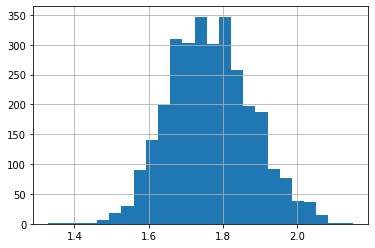

In [8]:
h = get_sample(athletes, 'height', n=3000, seed=42)
h.hist(bins=25)
plt.show()

In [9]:
print(f'Média = {h.mean()}, Mediana = {h.median()}, Moda = {float(h.mode())}')

# O grafico e o resultado são condizentes, entretanto a distribuição n é simetria, implicando que a media, 
# mediana e moda não são coincidentes

Média = 1.766779999999997, Mediana = 1.76, Moda = 1.8


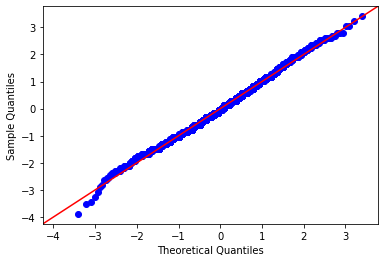

In [10]:
sm.qqplot(h, fit = True, line='45')
plt.show()

In [11]:
sct.shapiro(h)[1]

5.681722541339695e-07

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q2():
    h = get_sample(athletes, 'height', n=3000, seed=42)
    jarque_bera = sct.jarque_bera(h)
    return bool(jarque_bera[1] > 0.05)

In [13]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

In [14]:
print(f'Skewness = {sct.skew(h)}, Kurtosis = {(sct.kurtosis(h))}')
# O teste utiliza assimetria e a curtosis e a distribuicao normal,
# então espera-se que os valores sejam proximos de zero, então o resultado faz sentido

Skewness = 0.15974896040186146, Kurtosis = -0.046799141975459424


## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
def q3():
    w = get_sample(athletes, 'weight', n=3000, seed=42)
    dagostino_pearson = sct.normaltest(w)
    return bool(dagostino_pearson[1] > 0.05)

In [16]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

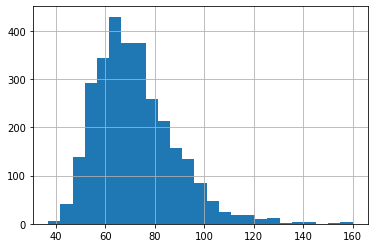

In [17]:
# Histograma
w = get_sample(athletes, 'weight', n=3000, seed=42)
w.hist(bins=25)
plt.show()

In [18]:
print(f'Média = {w.mean()}, Mediana = {w.median()}, Moda = {float(w.mode())}')

Média = 72.12266666666666, Mediana = 70.0, Moda = 70.0


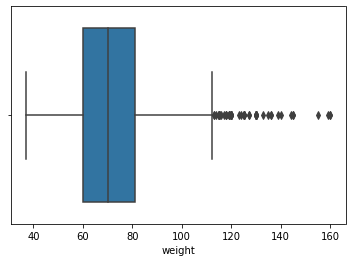

In [19]:
sns.boxplot(w)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
def q4():
    w = get_sample(athletes, 'weight', n=3000, seed=42)
    weight_log = np.log(w)
    dagostino_pearson = sct.normaltest(weight_log)
    return bool(dagostino_pearson[1] > 0.05)

In [21]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

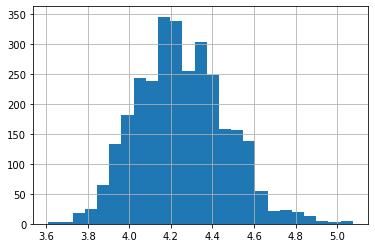

In [22]:
weight_log = np.log(get_sample(athletes, 'weight', n = 3000))
weight_log.hist(bins= 25)
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
def q5():
    bra = athletes[athletes['nationality']=='BRA']['height'].dropna()
    usa = athletes[athletes['nationality']=='USA']['height'].dropna()    
    bra_usa = sct.ttest_ind(bra, usa, equal_var=False)
    return bool(bra_usa[1]>0.05)

In [24]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [25]:
def q6():
    bra = athletes[athletes['nationality']=='BRA']['height'].dropna()
    can = athletes[athletes['nationality']=='CAN']['height'].dropna()
    bra_can = sct.ttest_ind(bra, can, equal_var=False)
    return bool(bra_can[1]>0.05)

In [26]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [27]:
def q7():
    usa = athletes[athletes['nationality']=='USA']['height'].dropna()
    can = athletes[athletes['nationality']=='CAN']['height'].dropna()
    
    usa_can = sct.ttest_ind(usa, can, equal_var=False)
    return float(round(usa_can[1], 8))

In [28]:
q7()

0.00046601